<a href="https://colab.research.google.com/github/orlandova939/mineriadata/blob/main/UFC_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving ufc-master.csv to ufc-master.csv


In [2]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('ufc-master.csv')


In [3]:
# Muestra las primeras 5 filas del DataFrame
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Neil Magny,Carlos Prates,550.0,-800.0,550.0000,12.5000,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,4:50,290.0,1100.0,800.0,1600.0,800.0,2000.0,-400.0
1,Gerald Meerschaert,Reinier de Ridder,250.0,-310.0,250.0000,32.2581,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Arm Triangle,3.0,1:44,704.0,700.0,200.0,600.0,165.0,1400.0,450.0
2,Gaston Bolanos,Cortavious Romious,205.0,-250.0,205.0000,40.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,550.0,275.0,3000.0,165.0,380.0,450.0
3,Luana Pinheiro,Gillian Robertson,360.0,-470.0,360.0000,21.2766,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,600.0,250.0,2200.0,110.0,900.0,500.0
4,Mansur Abdul-Malik,Dusko Todorovic,-485.0,370.0,20.6186,370.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,Punches,1.0,2:44,164.0,600.0,NaN,800.0,NaN,-250.0,NaN


In [4]:
# Eliminar las columnas irrelevantes
columns_to_keep = ['RedFighter', 'BlueFighter', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'Finish', 'FinishDetails', 'FinishRound', 'TotalFightTimeSecs']
df = df[columns_to_keep]


In [5]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)


In [6]:
# Verificar los tipos de datos
print(df.dtypes)

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])


RedFighter             object
BlueFighter            object
Date                   object
Location               object
Country                object
Winner                 object
TitleBout                bool
Finish                 object
FinishDetails          object
FinishRound           float64
TotalFightTimeSecs    float64
dtype: object


In [7]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df.dropna(inplace=True)


RedFighter            0
BlueFighter           0
Date                  0
Location              0
Country               0
Winner                0
TitleBout             0
Finish                0
FinishDetails         0
FinishRound           0
TotalFightTimeSecs    0
dtype: int64


In [8]:
# Convertir 'FinishRound' a tipo int (si no tiene decimales)
df['FinishRound'] = df['FinishRound'].fillna(0).astype(int)

# Convertir 'TotalFightTimeSecs' a tipo int
df['TotalFightTimeSecs'] = df['TotalFightTimeSecs'].astype(int)


In [9]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)


In [10]:
# Verificar las columnas y los tipos de datos
print(df.dtypes)


RedFighter                    object
BlueFighter                   object
Date                  datetime64[ns]
Location                      object
Country                       object
Winner                        object
TitleBout                       bool
Finish                        object
FinishDetails                 object
FinishRound                    int64
TotalFightTimeSecs             int64
dtype: object


In [11]:
# Verificar si hay valores nulos
print(df.isnull().sum())


RedFighter            0
BlueFighter           0
Date                  0
Location              0
Country               0
Winner                0
TitleBout             0
Finish                0
FinishDetails         0
FinishRound           0
TotalFightTimeSecs    0
dtype: int64


In [12]:
# Estadísticas descriptivas para las variables numéricas
print(df.describe())


                                Date  FinishRound  TotalFightTimeSecs
count                           2863  2863.000000         2863.000000
mean   2017-12-28 04:55:44.743276288     1.706951          373.045407
min              2010-03-21 00:00:00     1.000000            5.000000
25%              2014-08-26 12:00:00     1.000000          155.000000
50%              2017-12-01 00:00:00     1.000000          299.000000
75%              2021-12-18 00:00:00     2.000000          548.000000
max              2024-11-09 00:00:00     5.000000         1499.000000
std                              NaN     0.844088          268.433246


In [14]:
# Filtra solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])
correlation = numeric_columns.corr()
print(correlation)


                    FinishRound  TotalFightTimeSecs
FinishRound            1.000000            0.951902
TotalFightTimeSecs     0.951902            1.000000


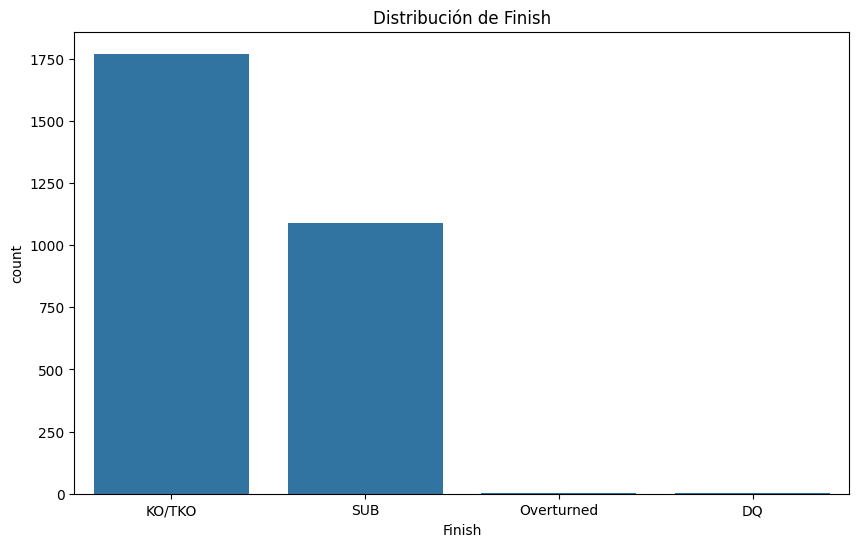

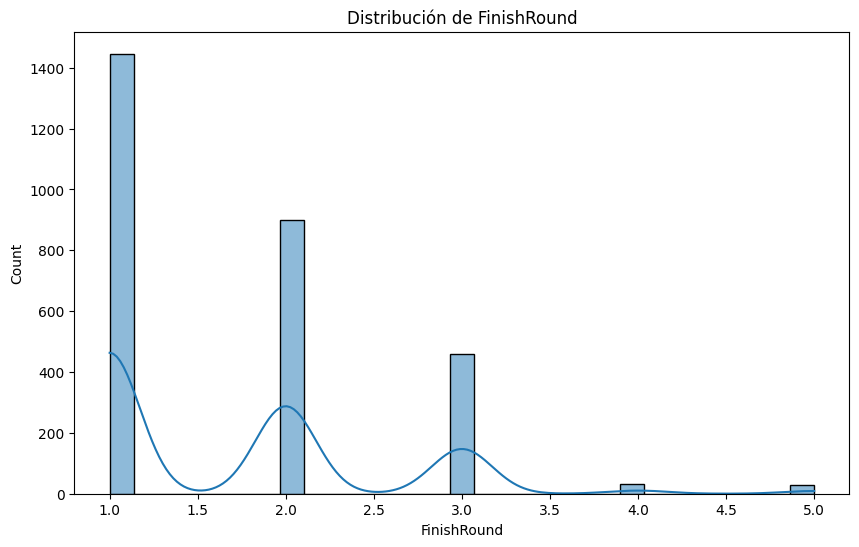

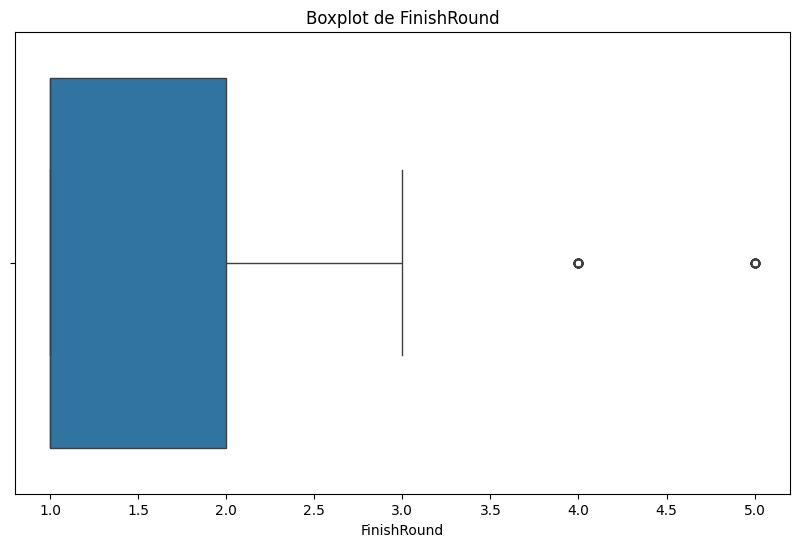

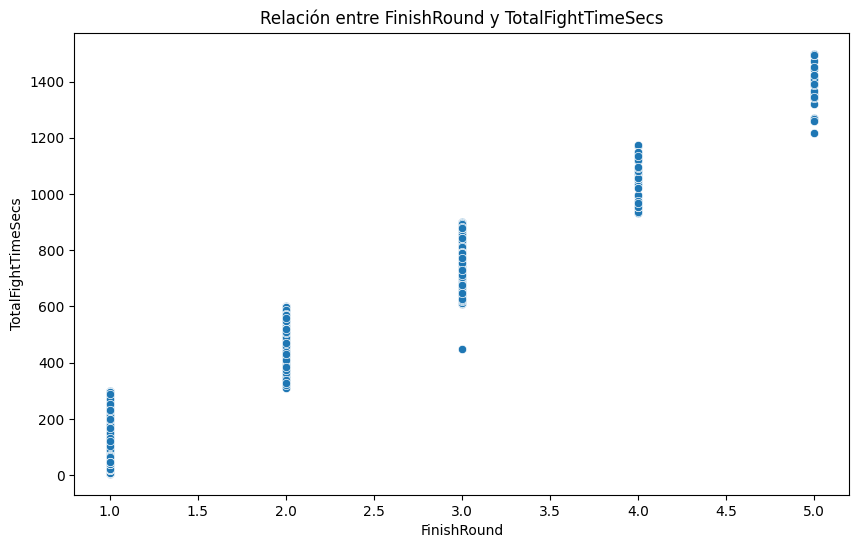

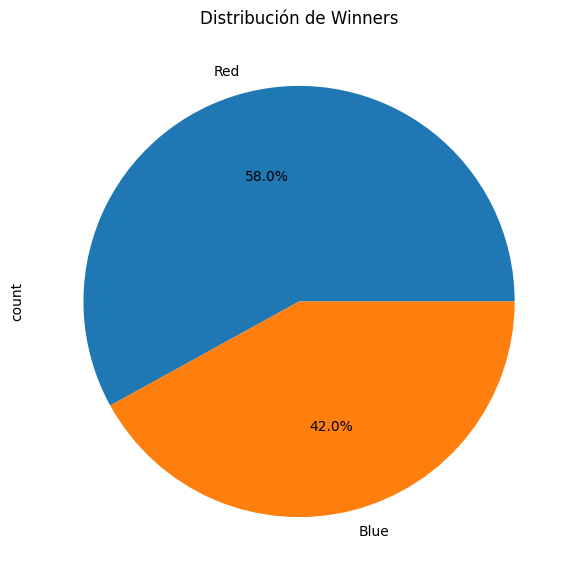

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico de barras para la columna 'Finish'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Finish')
plt.title('Distribución de Finish')
plt.show()

# 2. Histograma de 'FinishRound'
plt.figure(figsize=(10, 6))
sns.histplot(df['FinishRound'], kde=True)
plt.title('Distribución de FinishRound')
plt.show()

# 3. Boxplot para detectar valores atípicos en 'FinishRound'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FinishRound')
plt.title('Boxplot de FinishRound')
plt.show()

# 4. Scatter plot entre 'FinishRound' y 'TotalFightTimeSecs'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FinishRound', y='TotalFightTimeSecs')
plt.title('Relación entre FinishRound y TotalFightTimeSecs')
plt.show()

# 5. Pie chart para la columna 'Winner'
plt.figure(figsize=(10, 6))
df['Winner'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7))
plt.title('Distribución de Winners')
plt.show()


In [16]:
import scipy.stats as stats
import numpy as np


In [17]:
# Prueba de normalidad para 'TotalFightTimeSecs' dentro de cada grupo en 'Finish'
for category in df['Finish'].unique():
    group_data = df[df['Finish'] == category]['TotalFightTimeSecs']
    stat, p_value = stats.shapiro(group_data)
    print(f"Normalidad en {category}: p-valor = {p_value}")


Normalidad en KO/TKO: p-valor = 1.617046134202373e-29
Normalidad en SUB: p-valor = 6.514249723781488e-22


ValueError: Data must be at least length 3.

In [18]:
# Verificar el número de registros por cada categoría en 'Finish'
print(df['Finish'].value_counts())


Finish
KO/TKO        1771
SUB           1089
Overturned       2
DQ               1
Name: count, dtype: int64


In [19]:
# Filtrar los grupos "Overturned" y "DQ" que tienen menos de 3 registros
df_filtered = df[~df['Finish'].isin(['Overturned', 'DQ'])]

# Verificar la distribución después de eliminar los grupos pequeños
print(df_filtered['Finish'].value_counts())


Finish
KO/TKO    1771
SUB       1089
Name: count, dtype: int64


In [20]:
from scipy import stats

# Realizar la prueba de normalidad Shapiro-Wilk para los grupos restantes
for category in df_filtered['Finish'].unique():
    group_data = df_filtered[df_filtered['Finish'] == category]['TotalFightTimeSecs']
    stat, p_value = stats.shapiro(group_data)
    print(f"Normalidad en {category}: p-valor = {p_value}")


Normalidad en KO/TKO: p-valor = 1.617046134202373e-29
Normalidad en SUB: p-valor = 6.514249723781488e-22


In [21]:
from scipy import stats

# Datos filtrados para los dos grupos restantes
ko_tko_data = df_filtered[df_filtered['Finish'] == 'KO/TKO']['TotalFightTimeSecs']
sub_data = df_filtered[df_filtered['Finish'] == 'SUB']['TotalFightTimeSecs']

# Realizar la prueba de Kruskal-Wallis
h_stat, p_value = stats.kruskal(ko_tko_data, sub_data)

# Imprimir el resultado de la prueba
print(f"Resultado de Kruskal-Wallis: Estadístico H = {h_stat}, p-valor = {p_value}")


Resultado de Kruskal-Wallis: Estadístico H = 23.82756150147572, p-valor = 1.0536294381489453e-06


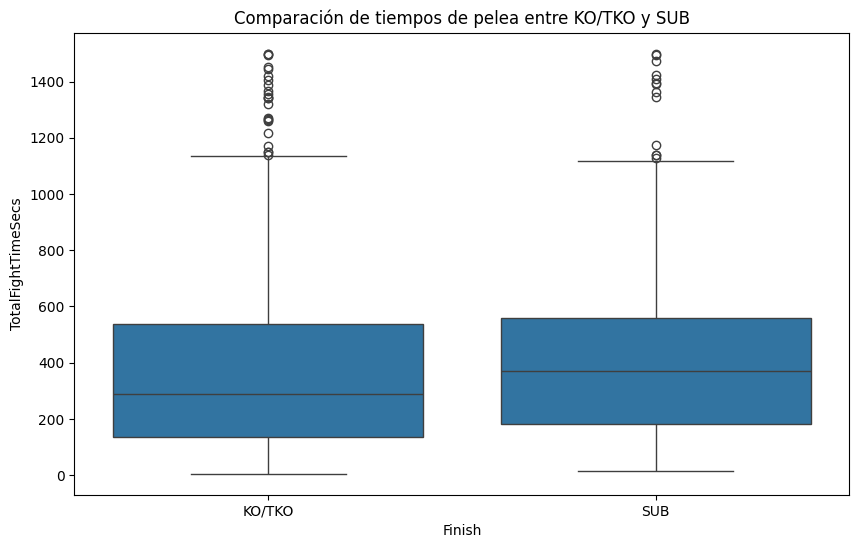

In [22]:
# esto lo agregue porque quiero ver el grafico de cuanto tiempo de diferencia genera un KO a una sumision

plt.figure(figsize=(10, 6))
sns.boxplot(x='Finish', y='TotalFightTimeSecs', data=df_filtered)
plt.title('Comparación de tiempos de pelea entre KO/TKO y SUB')
plt.show()


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepara los datos: seleccionamos las columnas relevantes para el modelo
df_cleaned = df[['FinishRound', 'TitleBout', 'TotalFightTimeSecs']]
df_cleaned.dropna(inplace=True)  # Asegúrate de que no haya valores nulos

# Variables predictoras (X) y objetivo (y)
X = df_cleaned[['FinishRound', 'TitleBout']]
y = df_cleaned['TotalFightTimeSecs']

# Divide los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 6478.963369971013
R^2 Score: 0.9035910529237764


<ipython-input-23-e1076c9469e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)  # Asegúrate de que no haya valores nulos


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Paso 1: Preparar los datos
# Seleccionamos las características numéricas y la columna objetivo (Winner)
X = df[['FinishRound', 'TotalFightTimeSecs']]  # Características (features)
y = df['Winner'].dropna()  # Columna objetivo (target), asegurándonos de eliminar los nulos

# Paso 2: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paso 4: Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Elegimos k=5
knn.fit(X_train, y_train)

# Paso 5: Realizar predicciones
y_pred = knn.predict(X_test)

# Paso 6: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f"Exactitud del modelo (Accuracy): {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)


Exactitud del modelo (Accuracy): 0.4912689173457509
Matriz de confusión:
[[115 241]
 [196 307]]
Reporte de clasificación:
              precision    recall  f1-score   support

        Blue       0.37      0.32      0.34       356
         Red       0.56      0.61      0.58       503

    accuracy                           0.49       859
   macro avg       0.46      0.47      0.46       859
weighted avg       0.48      0.49      0.48       859



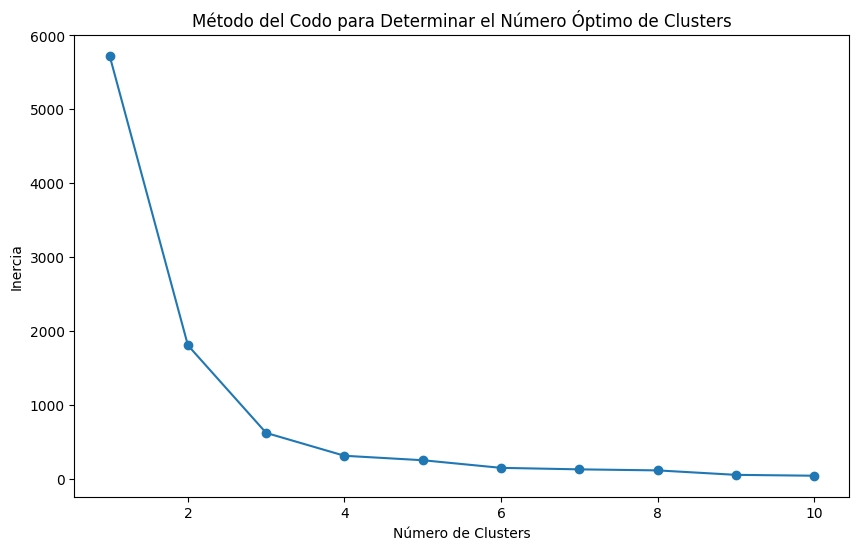

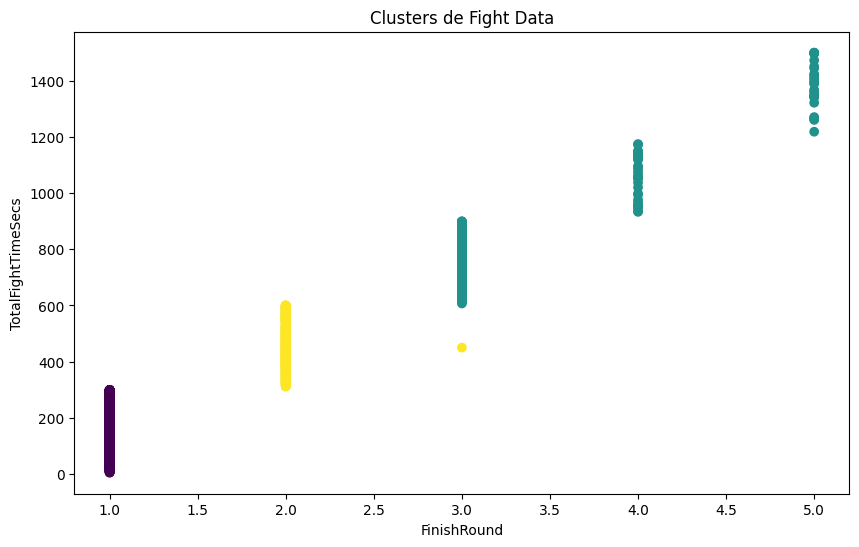

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Escalar las características numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['FinishRound', 'TotalFightTimeSecs']])

# 2. Aplicar K-Means para encontrar el número óptimo de clusters (usando el método del codo)
inertia = []
for k in range(1, 11):  # Intentamos con k entre 1 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# 3. Aplicar K-Means con el número óptimo de clusters (por ejemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 4. Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['FinishRound'], df['TotalFightTimeSecs'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters de Fight Data')
plt.xlabel('FinishRound')
plt.ylabel('TotalFightTimeSecs')
plt.show()


Mean Squared Error (MSE): 67113.61166008818
R^2 Score: 0.0013290297919047456


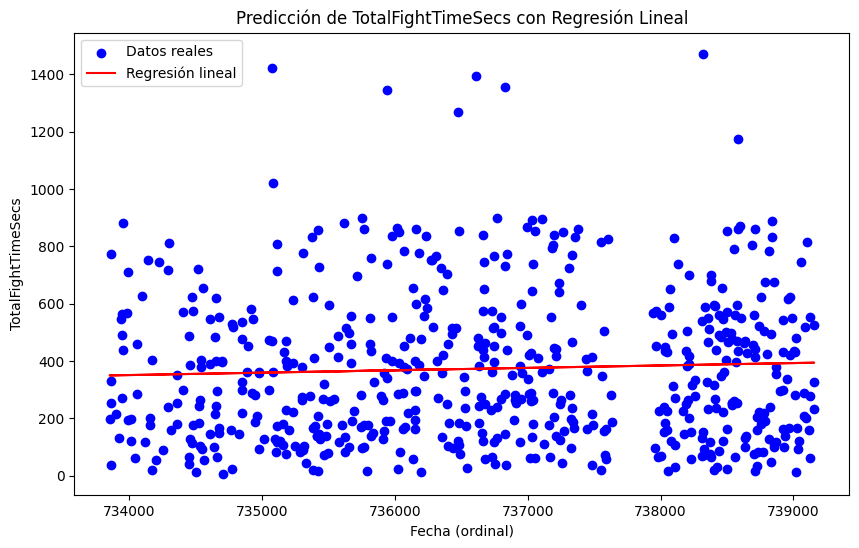

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 1. Asegúrate de que 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Convertir la columna 'Date' en números (para usarla en el modelo)
df['Date_ordinal'] = df['Date'].map(lambda x: x.toordinal())

# 3. Seleccionar las variables para la predicción
# Usamos 'Date_ordinal' como la variable independiente y 'TotalFightTimeSecs' como la dependiente
X = df[['Date_ordinal']]  # Variable independiente (fecha convertida)
y = df['TotalFightTimeSecs']  # Variable dependiente (tiempo de pelea en segundos)

# 4. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear el modelo de regresión lineal y entrenarlo
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Realizar predicciones
y_pred = model.predict(X_test)

# 7. Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE) y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# 8. Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Regresión lineal')
plt.title('Predicción de TotalFightTimeSecs con Regresión Lineal')
plt.xlabel('Fecha (ordinal)')
plt.ylabel('TotalFightTimeSecs')
plt.legend()
plt.show()
